In [33]:
import pandas as pd
#how many columns you want to see
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#read csv

df_o=pd.read_csv('../data/clean_data.csv')

In [29]:
#copy
df= df_o.copy()

In [30]:
#% nulls
df.isnull().mean()*100

user_id              0.00
group                0.00
visit_date           0.00
conversion           0.00
product_category     0.00
product_id           0.00
product_name         0.00
quantity             0.00
price                2.00
discount             2.00
total_value          0.00
payment_method      87.65
shipping_method     87.65
region               0.00
customer_age         2.00
customer_gender      0.00
device               0.00
session_duration     0.00
coupon_used         87.65
browser              0.00
referral_source      0.00
conversion_str       0.00
dtype: float64

In [31]:
#dataframe with nulls only
df_null= df.loc[:,df.isnull().sum()>0]
df_null

,price,discount,payment_method,shipping_method,customer_age,coupon_used
0,41.27,0.29,NaN,NaN,64.0,NaN
1,45.45,0.22,NaN,NaN,19.0,NaN
2,64.81,0.08,NaN,NaN,69.0,NaN
3,189.40,0.08,credit_card,express,53.0,no
4,19.82,0.19,NaN,NaN,18.0,NaN
...,...,...,...,...,...,...
1995,177.49,0.20,NaN,NaN,25.0,NaN
1996,109.75,0.20,NaN,NaN,58.0,NaN
1997,236.05,0.15,NaN,NaN,62.0,NaN
1998,22.67,0.11,NaN,NaN,46.0,NaN


categorical nulls

In [32]:
for col in df_null.select_dtypes(include='O').columns:
    print(col.upper())
    display(df[col].value_counts()/df.shape[0]*100)
    print('__________')


PAYMENT_METHOD


payment_method
bank_transfer       3.65
credit_card         3.35
paypal              2.85
cash_on_delivery    2.50
Name: count, dtype: float64

__________
SHIPPING_METHOD


shipping_method
express     4.50
same_day    4.10
standard    3.75
Name: count, dtype: float64

__________
COUPON_USED


coupon_used
no     6.60
yes    5.75
Name: count, dtype: float64

__________


In [39]:
def subplot_col_cat(dataframe):
    # select columns categoric
    categorica_col=dataframe.select_dtypes(include=['O','category']).columns
    
    if len(categorica_col)== 0:

        return "there are no categorical columns"
    # size figuer
    
    num_cols= len(categorica_col)
    rows= (num_cols + 2)//3 # calculation to put 3 columns per row
    fig, axes= plt.subplots(rows,3,figsize=(15, rows*5))
    axes= axes.flatten()# convert the axes to a flat 1d array for iteration
    
    ##create graph for categorical
    
    for i, col in  enumerate(categorica_col):
        sns.countplot(data=dataframe,x= col,ax=axes[i],hue=col,palette="tab10",legend=False)
        axes[i].set_title(f'distribuction the {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequence')
        axes[i].tick_params(axis='x',rotation=90)
    #remove excess axles
    for j in range (i+ 1, len(axes)):
        fig.delaxes(axes[j])
    #adjust design
    plt.tight_layout()
    plt.show
    

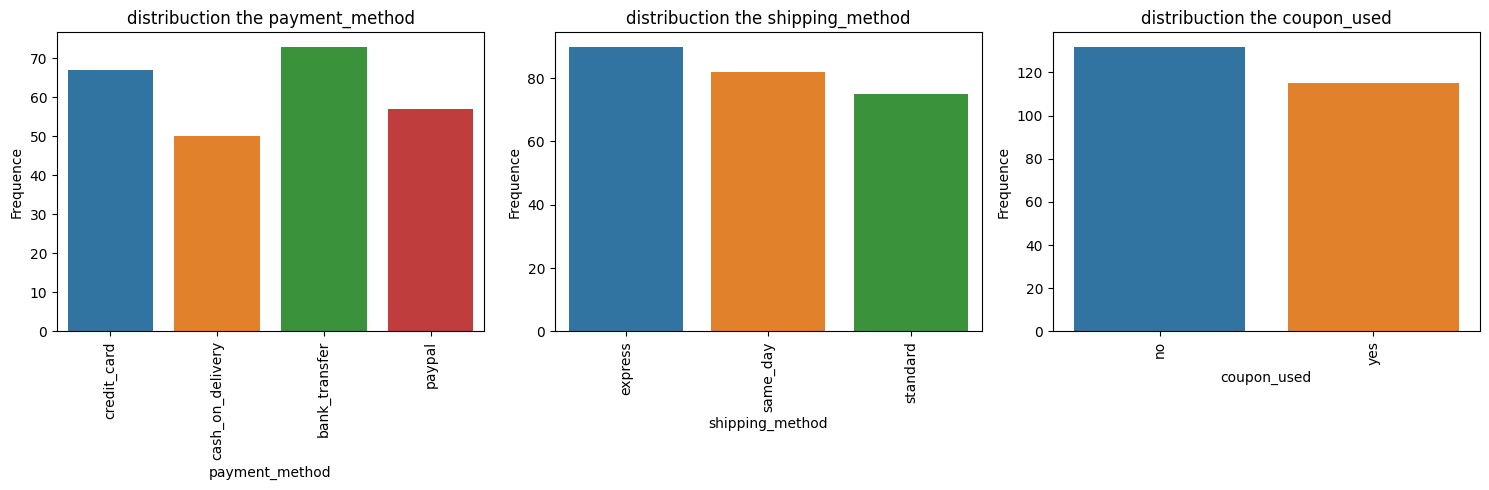

In [40]:
subplot_col_cat(df_null)

In [41]:
df_null.select_dtypes(include='O').isnull().mean()*100

payment_method     87.65
shipping_method    87.65
coupon_used        87.65
dtype: float64

In [44]:
df_not_buy= df[df['conversion']==0]
df_not_buy.isnull().mean()*100

user_id               0.000000
group                 0.000000
visit_date            0.000000
conversion            0.000000
product_category      0.000000
product_id            0.000000
product_name          0.000000
quantity              0.000000
price                 1.711352
discount              1.939532
total_value           0.000000
payment_method      100.000000
shipping_method     100.000000
region                0.000000
customer_age          2.110667
customer_gender       0.000000
device                0.000000
session_duration      0.000000
coupon_used         100.000000
browser               0.000000
referral_source       0.000000
conversion_str        0.000000
dtype: float64

conclusion: Checking for nulls in categories is due to the fact that no purchase or transport was made nor was a coupon used.

In [46]:
df.loc[:,df.select_dtypes(include='O').columns]=df.select_dtypes(include='O').fillna('no_conversion')